In [38]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns

# Make NumPy printouts easier to read.
#np.set_printoptions(precision=3, suppress=True)

In [39]:
import os
os.environ['PATH'].split(';')[0]

'C:\\Users\\hooman.habibi\\Anaconda3\\envs\\tf'

In [40]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


<IPython.core.display.Javascript object>


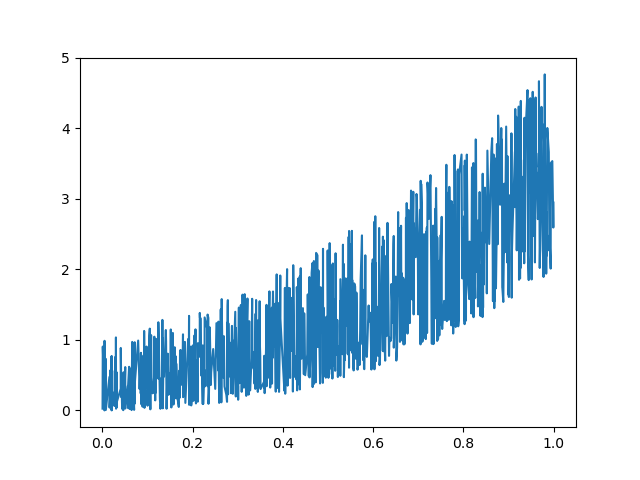

In [41]:
df=pd.DataFrame(np.random.random((1000,2)),columns=['A','B'])
df.index=np.arange(df.shape[0])
df.sort_values('A',inplace=True)
ff=lambda X,Y: (X+Y)**2+X**3
#df['C']= (df['A']+df['B'])**2+df['A']**3
df['C']= ff(df['A'],df['B'])
plt.figure()
plt.plot(df.A,df.C)

In [57]:
# plt.figure()
# plt.plot(df.A,df.C)
X=df[['A','B']].values
X=X-np.mean(X,axis=0)
X=X/np.std(X,axis=0)
Y=df['C'].values.reshape(-1,1)

In [43]:
# normalizer = tf.keras.layers.Normalization(axis=-1)
# normalizer.adapt(np.array(df[['A','B']]))


In [99]:
def build_and_compile_model():
    model = keras.Sequential([
          layers.Dense(5, activation='relu'),
          layers.Dense(5, activation='relu'),
          layers.Dense(1)
      ])
#     model = keras.Sequential([
#           layers.Dense(5, activation='sigmoid'),
#           layers.Dense(5, activation='sigmoid'),
#           layers.Dense(1)
#       ])

    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
    return model
mdl = build_and_compile_model()

Sigmoid: not blowing up activation
Relu : not vanishing gradient
Relu : More computationally efficient to compute than Sigmoid like functions since Relu just needs to pick max(0,x) and not perform expensive exponential operations as in Sigmoids
Relu : In practice, networks with Relu tend to show better convergence performance than sigmoid

In [100]:
history = mdl.fit(
    X,
    Y,
    epochs=1000,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [46]:
#dir(history)

<IPython.core.display.Javascript object>


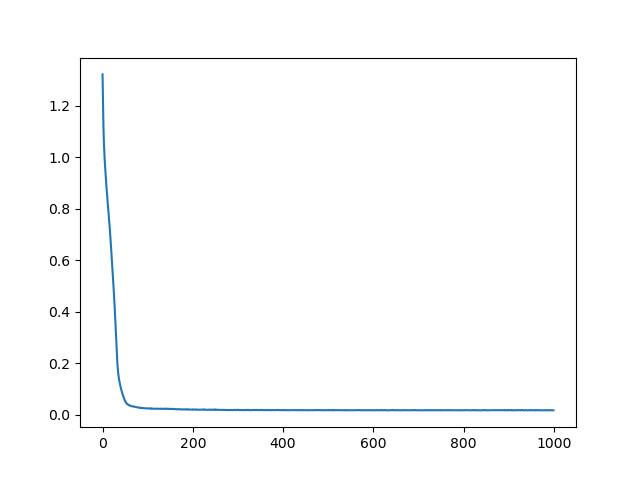

In [101]:
plt.figure()
plt.plot(history.history['loss'])

<IPython.core.display.Javascript object>


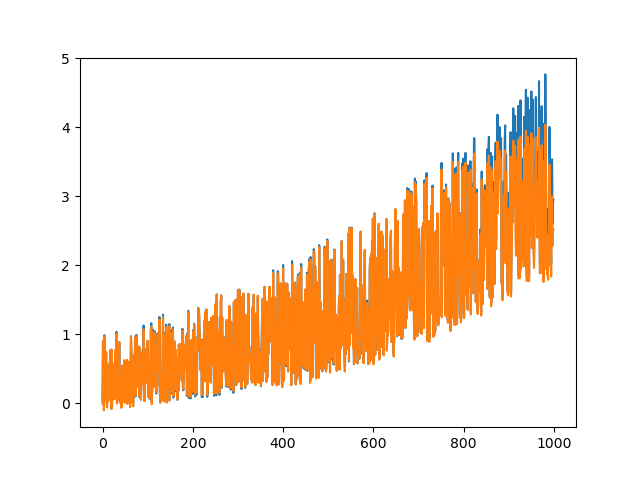

In [102]:
Y_=mdl.predict(X)
plt.figure()
plt.plot(Y)
plt.plot(Y_)